In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import os
import io
import string
import re
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier

In [21]:
reviews = pd.read_csv('Restaurant reviews.csv')
reviews.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [22]:
reviews.isnull().sum()

Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64

In [23]:
reviews.shape

(10000, 7)

In [24]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


In [25]:
reviews =reviews.dropna()

In [26]:
reviews.shape

(9955, 7)

In [27]:
reviews_txt = reviews[['Review', 'Rating']]
reviews_txt.head()

,Review,Rating
0,"The ambience was good, food was quite good . h...",5
1,Ambience is too good for a pleasant evening. S...,5
2,A must try.. great food great ambience. Thnx f...,5
3,Soumen das and Arun was a great guy. Only beca...,5
4,Food is good.we ordered Kodi drumsticks and ba...,5


In [ ]:
reviews_txt['Rating'] = reviews_txt['Rating'].replace('Like', 5)
reviews_txt['Rating'] = reviews_txt['Rating'].astype('float')

In [ ]:
reviews_txt['Rating'] = np.where(reviews_txt['Rating']<4, 0, 1) #0 for BAD rating and 1 for Good rating

In [30]:
reviews_txt.head()

,Review,Rating
0,"The ambience was good, food was quite good . h...",1
1,Ambience is too good for a pleasant evening. S...,1
2,A must try.. great food great ambience. Thnx f...,1
3,Soumen das and Arun was a great guy. Only beca...,1
4,Food is good.we ordered Kodi drumsticks and ba...,1


In [31]:
reviews_txt['Rating'].value_counts()

1    6269
0    3686
Name: Rating, dtype: int64

In [32]:
reviews['Restaurant'].value_counts()

Beyond Flavours               100
PourHouse7                    100
Urban Asia - Kitchen & Bar    100
The Indi Grill                100
The Tilt Bar Republic         100
                             ... 
Being Hungry                   99
Olive Garden                   99
Hyderabad Chefs                98
Arena Eleven                   85
American Wild Wings            77
Name: Restaurant, Length: 100, dtype: int64

Data Visualization

In [18]:
reviews.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],
      dtype='object')

In [34]:
cleanup_re = re.compile('[^a-z]+')
def clean(sentence): 
  sentence = str(sentence)
  sentence = sentence.lower()
  sentence = cleanup_re.sub(' ', sentence).strip()
  return sentence
reviews_txt['Review'] = reviews_txt['Review'].apply(clean)

C:\Users\kleel\AppData\Local\Temp/ipykernel_32756/2750618693.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_txt['Review'] = reviews_txt['Review'].apply(clean)


In [35]:
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\kleel\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\cmudict.zip.
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\kleel\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\gazetteers.zip.
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\kleel\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\genesis.zip.
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\kleel\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\gutenberg.zip.
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\kleel\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     C:\Users\kleel\AppData\Roaming\nl

True

In [37]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [38]:
def preprocess(sentence):
  sentence = str(sentence)
  word_tokens = word_tokenize(sentence)
  stop_words = set(stopwords.words('english'))
  sentence = ' '.join([i for i in word_tokens if not i in stop_words])
  return sentence

reviews_txt['Review'] = reviews_txt['Review'].apply(preprocess)

C:\Users\kleel\AppData\Local\Temp/ipykernel_32756/2583523945.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_txt['Review'] = reviews_txt['Review'].apply(preprocess)


In [39]:
reviews_txt.head()

,Review,Rating
0,ambience good food quite good saturday lunch c...,1
1,ambience good pleasant evening service prompt ...,1
2,must try great food great ambience thnx servic...,1
3,soumen das arun great guy behavior sincerety g...,1
4,food good ordered kodi drumsticks basket mutto...,1


In [61]:
from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()
def preprocess4(sentence):
  input_str=word_tokenize(sentence)
  lemmatized_output = ' '.join([lemma.lemmatize(w) for w in input_str])
  return lemmatized_output

reviews_txt['Review'] = reviews_txt['Review'].apply(preprocess4)

C:\Users\kleel\AppData\Local\Temp/ipykernel_32756/97814770.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_txt['Review'] = reviews_txt['Review'].apply(preprocess4)


In [62]:
reviews_txt.head()

,Review,Rating
0,ambience good food quite good saturday lunch c...,1
1,ambience good pleasant evening service prompt ...,1
2,must try great food great ambience thnx servic...,1
3,soumen da arun great guy behavior sincerety go...,1
4,food good ordered kodi drumstick basket mutton...,1


In [63]:
X = reviews_txt['Review']
y = reviews_txt['Rating']

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [65]:
X_train.shape, X_test.shape

((7964,), (1991,))

In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer
# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
tfidf_vect.fit(X_train)
xtrain_tfidf =  tfidf_vect.transform(X_train)
xtest_tfidf =  tfidf_vect.transform(X_test)

In [68]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    
    return accuracy_score(predictions, y_test)

In [69]:
# Naive Bayes on Word Level TF IDF Vectors
accuracy = train_model(MultinomialNB(), xtrain_tfidf, y_train, xtest_tfidf)
print("NB, WordLevel TF-IDF: ", accuracy)

NB, WordLevel TF-IDF:  0.8533400301356102


In [70]:
# Logistic on Word Level TF IDF Vectors
accuracy = train_model(LogisticRegression(), xtrain_tfidf, y_train, xtest_tfidf)
print("WordLevel TF-IDF: ", accuracy)

WordLevel TF-IDF:  0.8674033149171271


In [71]:
# Random Forest on Word Level TF IDF Vectors
accuracy = train_model(RandomForestClassifier(), xtrain_tfidf, y_train, xtest_tfidf)
print("WordLevel TF-IDF: ", accuracy)

WordLevel TF-IDF:  0.8694123556002009


In [72]:
# Bagging on Word Level TF IDF Vectors
accuracy = train_model(BaggingClassifier(), xtrain_tfidf, y_train, xtest_tfidf)
print("WordLevel TF-IDF: ", accuracy)

WordLevel TF-IDF:  0.8252134605725766


Classification using LSTM and tensorflow

In [81]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Embedding
from keras.layers import SpatialDropout1D
from keras.layers import LSTM
from keras.callbacks import EarlyStopping
from keras.layers import Bidirectional
from keras.layers import Dropout

In [82]:
#max words to be used
MAX_WORDS = 1000
#max length of the sequence
MAX_LEN = 25
EMBEDDING_DIM = 50 #50-300
tokenizer = Tokenizer(num_words=MAX_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(X)
word_index = tokenizer.word_index
print('number of unique tokens are: ', len(word_index))

number of unique tokens are:  13263


In [83]:
from keras.preprocessing.sequence import pad_sequences

In [84]:
X = tokenizer.texts_to_sequences(X)
X = pad_sequences(X, maxlen=MAX_LEN)
print('shape of data tensor is', X.shape)

shape of data tensor is (9955, 25)


In [85]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size = 0.2, random_state = 100)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(7964, 25) (7964,)
(1991, 25) (1991,)


Building LSTM model

In [110]:
model = Sequential()
model.add(Embedding(input_dim=MAX_WORDS, output_dim= EMBEDDING_DIM, input_length=MAX_LEN))
model.add(LSTM(300, recurrent_dropout=0.2))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy',tf.keras.metrics.AUC(),keras.metrics.Recall(),keras.metrics.Precision()])
print(model.summary())
history =model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10, batch_size=64)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 25, 50)            50000     
_________________________________________________________________
lstm_10 (LSTM)               (None, 300)               421200    
_________________________________________________________________
dropout_10 (Dropout)         (None, 300)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 301       
Total params: 471,501
Trainable params: 471,501
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
125/125 [==============================] - 30s 217ms/step - loss: 0.4733 - accuracy: 0.7716 - auc_3: 0.8415 - recall_5: 0.9308 - precision_4: 0.7597 - val_loss: 0.3522 - val_accuracy: 0.8559 - val_auc_3: 0.9178 - val_recall_5: 0.

In [97]:
# Save the trained model
model.save("LSTM.h5")
print("Model saved successfully.")

Model saved successfully.


In [89]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from keras.models import load_model
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

loaded_model = load_model("LSTM.h5")

def predict_sentiment(sample_review, tokenizer, max_len):
    sample_review = re.sub(pattern='[^a-zA-Z]', repl=' ', string=sample_review)
    sample_review = sample_review.lower()
    sample_review_words = word_tokenize(sample_review)
    sample_review_words = [word for word in sample_review_words if not word in set(stopwords.words('english'))]
    
    lemmatizer = WordNetLemmatizer()
    final_review = [lemmatizer.lemmatize(word) for word in sample_review_words]
    final_review = ' '.join(final_review)

    # Tokenize the review using the provided tokenizer
    sequence = tokenizer.texts_to_sequences([final_review])
    # Pad sequences to the same length as used during training
    padded_sequence = pad_sequences(sequence, maxlen=max_len)

    # Predict sentiment using the loaded model
    prediction = loaded_model.predict(padded_sequence)
    return prediction

sample_review = "Its a very nice place, ambience is different, all the food we ordered was very tasty, service is also gud, worth visit. Its reasonable as well. Really a must visit place."
prediction = predict_sentiment(sample_review, tokenizer, MAX_LEN)
print(prediction)

[[0.9970025]]


In [105]:
history.history.keys()

AttributeError: 'dict' object has no attribute 'history'

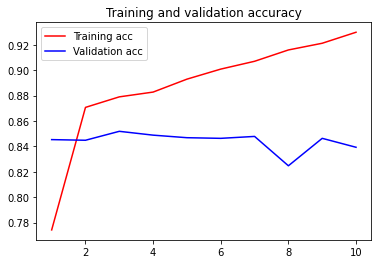

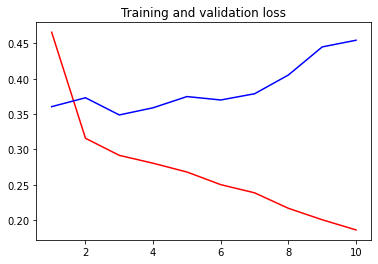

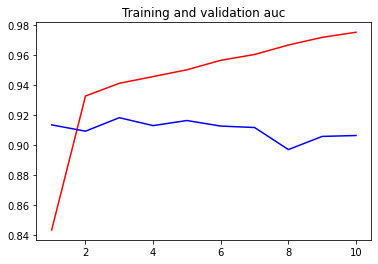

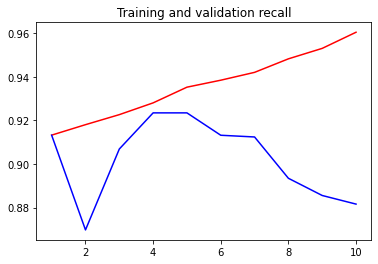

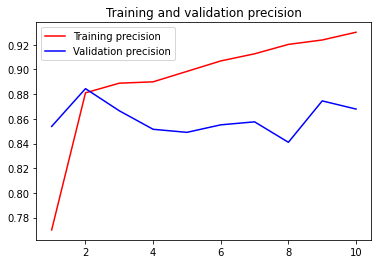

In [101]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
auc_2 = history.history['auc_2']
val_auc_2 = history.history['val_auc_2']
recall_4 = history.history['recall_4']
val_recall_4 = history.history['val_recall_4']
precision_3 = history.history['precision_3']
val_precision_3 = history.history['val_precision_3']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')

plt.figure()
plt.title('Training and validation auc')
plt.plot(epochs, auc_2, 'red', label='Training auc')
plt.plot(epochs, val_auc_2, 'blue', label='Validation auc')

plt.figure()
plt.title('Training and validation recall')
plt.plot(epochs, recall_4, 'red', label='Training recall')
plt.plot(epochs, val_recall_4, 'blue', label='Validation recall')

plt.figure()
plt.title('Training and validation precision')
plt.plot(epochs, precision_3, 'red', label='Training precision')
plt.plot(epochs, val_precision_3, 'blue', label='Validation precision')

plt.legend()

plt.show()

In [109]:
import pandas as pd

# Assuming you have a history object containing metrics from model training/validation
history = history

# Convert history to a DataFrame
history_df = pd.DataFrame(history)

# Save DataFrame to Excel
excel_filename = 'metrics.xlsx'
history_df.to_excel(excel_filename, index=False, engine='openpyxl')

print("Metrics saved to", excel_filename)

Metrics saved to metrics.xlsx


In [103]:
pip install openpyxl

  Obtaining dependency information for openpyxl from https://files.pythonhosted.org/packages/6a/94/a59521de836ef0da54aaf50da6c4da8fb4072fb3053fa71f052fd9399e7a/openpyxl-3.1.2-py2.py3-none-any.whl.metadata
  Obtaining dependency information for et-xmlfile from https://files.pythonhosted.org/packages/96/c2/3dd434b0108730014f1b96fd286040dc3bcb70066346f7e01ec2ac95865f/et_xmlfile-1.1.0-py3-none-any.whl.metadata
   -------------------------------------- 250.0/250.0 kB 639.3 kB/s eta 0:00:00




[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip
